In [2]:
# coding:utf-8
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore') #不输出警告
np.set_printoptions(suppress=True)

In [3]:
data = pd.read_csv('Advertising.csv')
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
print(x)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,train_size=0.7)
print(x_train)
print(y_train)

        TV  Radio  Newspaper
122  224.0    2.4       15.6
13    97.5    7.6        7.2
167  206.8    5.2       19.4
68   237.4   27.5       11.0
60    53.5    2.0       21.4
37    74.7   49.4       45.7
3    151.5   41.3       58.5
148   38.0   40.3       11.9
77   120.5   28.5       14.2
158   11.7   36.9       45.2
168  215.4   23.6       57.6
135   48.3   47.0        8.5
181  218.5    5.4       27.4
132    8.4   27.2        2.1
90   134.3    4.9        9.3
93   250.9   36.5       72.3
91    28.6    1.5       33.0
81   239.8    4.1       36.9
28   248.8   27.1       22.9
0    230.1   37.8       69.2
128  220.3   49.0        3.2
57   136.2   19.2       16.6
153  171.3   39.7       37.7
114   78.2   46.8       34.5
120  141.3   26.8       46.2
198  283.6   42.0       66.2
76    27.5    1.6       20.7
109  255.4   26.9        5.5
49    66.9   11.7       36.8
177  170.2    7.8       35.2
..     ...    ...        ...
192   17.2    4.1       31.6
144   96.2   14.8       38.9
123  123.1   3

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
#model = Lasso()
model = Ridge()
alpha_can = np.logspace(-3, 2, 10)
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=8)
lasso_model.fit(x_train, y_train)
print('lasso_model.best_params_：\n', lasso_model.best_params_)
print('lasso_model.grid_scores_',lasso_model.grid_scores_)
print('lasso_model.best_score_',lasso_model.best_score_)
y_hat = lasso_model.predict(np.array(x_test))
print(lasso_model.score(x_test, y_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

lasso_model.best_params_：
 {'alpha': 100.0}
lasso_model.grid_scores_ [mean: 0.87331, std: 0.04267, params: {'alpha': 0.001}, mean: 0.87331, std: 0.04267, params: {'alpha': 0.0035938136638046258}, mean: 0.87331, std: 0.04267, params: {'alpha': 0.01291549665014884}, mean: 0.87331, std: 0.04267, params: {'alpha': 0.046415888336127795}, mean: 0.87331, std: 0.04267, params: {'alpha': 0.1668100537200059}, mean: 0.87331, std: 0.04267, params: {'alpha': 0.59948425031894093}, mean: 0.87331, std: 0.04266, params: {'alpha': 2.1544346900318843}, mean: 0.87332, std: 0.04265, params: {'alpha': 7.7426368268112773}, mean: 0.87332, std: 0.04261, params: {'alpha': 27.825594022071257}, mean: 0.87335, std: 0.04247, params: {'alpha': 100.0}]
lasso_model.best_score_ 0.873345805432
0.915232753209
1.98213253677 1.40788228797


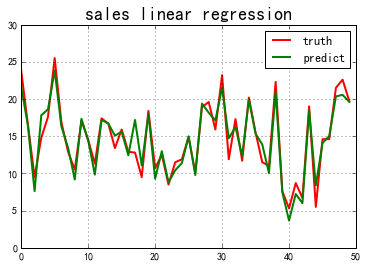

In [6]:
t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.plot(t, y_test, 'r-', linewidth=2, label=u'truth')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'predict')
plt.title(u'sales linear regression', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
[ 0.04656457  0.17915812  0.00345046]
2.87696662232
1.97304562023 1.40465142303


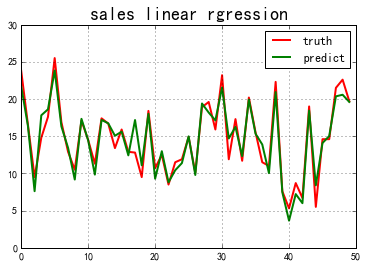

In [7]:
linreg = LinearRegression(normalize=True)
model = linreg.fit(x_train, y_train)
print(model)
print(linreg.coef_)
print(linreg.intercept_)

y_hat = linreg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'truth')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'predict')
plt.legend(loc='upper right')
plt.title(u'sales linear rgression', fontsize=18)
plt.grid()
plt.show()

In [8]:
lasso_cv = LassoCV(alphas=alpha_can,cv=8)
lasso_cv.fit(x_train,y_train)
print(lasso_cv.coef_)
print(lasso_cv.intercept_)
y_cv = lasso_cv.predict(np.array(x_test))
print("mse of Linear Regresion+Lasso squares is", np. mean(( y_cv - y_test ) ** 2))  
print("accuracy of Linear regression is",lasso_cv.score(x_test,y_test))

[ 0.04638068  0.17116219  0.00112028]
3.15746392628
mse of Linear Regresion+Lasso squares is 2.057131156196921
accuracy of Linear regression is 0.912025386213


In [9]:
ridge_cv = RidgeCV(alphas=alpha_can,cv=8)
ridge_cv.fit(x_train,y_train)
print("参数theta",ridge_cv.coef_)
print(ridge_cv.intercept_)
y_cv = ridge_cv.predict(np.array(x_test))
print("mse of Linear Regresion+Lasso squares is", np. mean(( y_cv - y_test ) ** 2))  
print("accuracy of Linear regression is",ridge_cv.score(x_test,y_test))

参数theta [ 0.0465626   0.17853158  0.0036319 ]
2.88635119155
mse of Linear Regresion+Lasso squares is 1.98213253677463
accuracy of Linear regression is 0.915232753209
